<a href="https://colab.research.google.com/github/AmithPenumudi/ISTE_ML/blob/main/ISTE_ML_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week-3** Assignment

Question-1

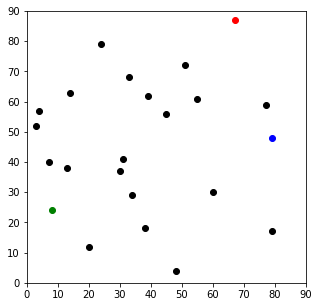

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.DataFrame({
    'x':[60,7,3,38,13,30,39,33,51,77,79,31,34,48,4,55,20,45,14,24],
    'y':[30,40,52,18,38,37,62,68,72,59,17,41,29,4,57,61,12,56,63,79]
})

np.random.seed(100)

k=3
centroids={
    i+1:[np.random.randint(0,90),np.random.randint(0,90)]
    for i in range (k)
}
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'g',2:'r',3:'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,90)
plt.ylim(0,90) 
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  60  30        52.345009        57.428216        26.172505        3     b
1   7  40        16.031220        76.216796        72.443081        1     g
2   3  52        28.442925        72.945185        76.105190        1     g
3  38  18        30.594117        74.846510        50.803543        1     g
4  13  38        14.866069        72.917762        66.753277        1     g


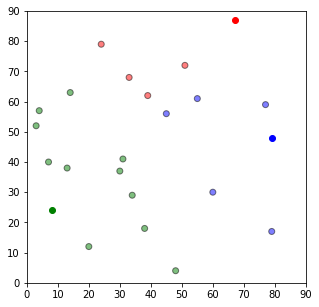

In [33]:
def assignment(df, centroids):
  for i in centroids.keys():
    df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['x'] - centroids[i][0])**2 + (df['y']-centroids[i][1])**2) )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()

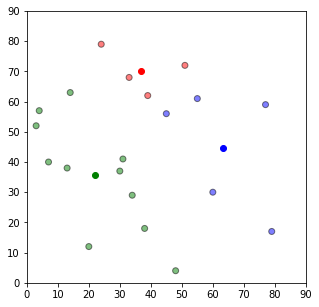

In [34]:
#Update

import copy

old_centroids=copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0]=np.mean(df[df['closest']==i]['x'])
    centroids[i][1]=np.mean(df[df['closest']==i]['y'])
  return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()

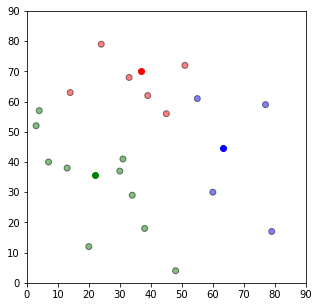

In [35]:
df = assignment(df,centroids)

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()

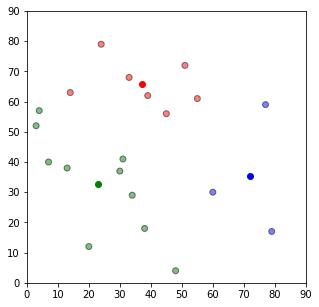

In [36]:
# CONTINUE UNTILL THERE IS NO CHANGE IN O/P
while True:
  closest_centroids = df['closest'].copy(deep = True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()

Question-2

In [37]:
# Using skikit learn, K-Means Clustering:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Mall_Customers.csv")
df=df.drop(axis=1,columns=['CustomerID','Gender'])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
clusters = kmeans.fit_predict(df.iloc[:,1:])
df["label"] = clusters

In [38]:
from mpl_toolkits.mplot3d import Axes3D

<Figure size 432x288 with 0 Axes>

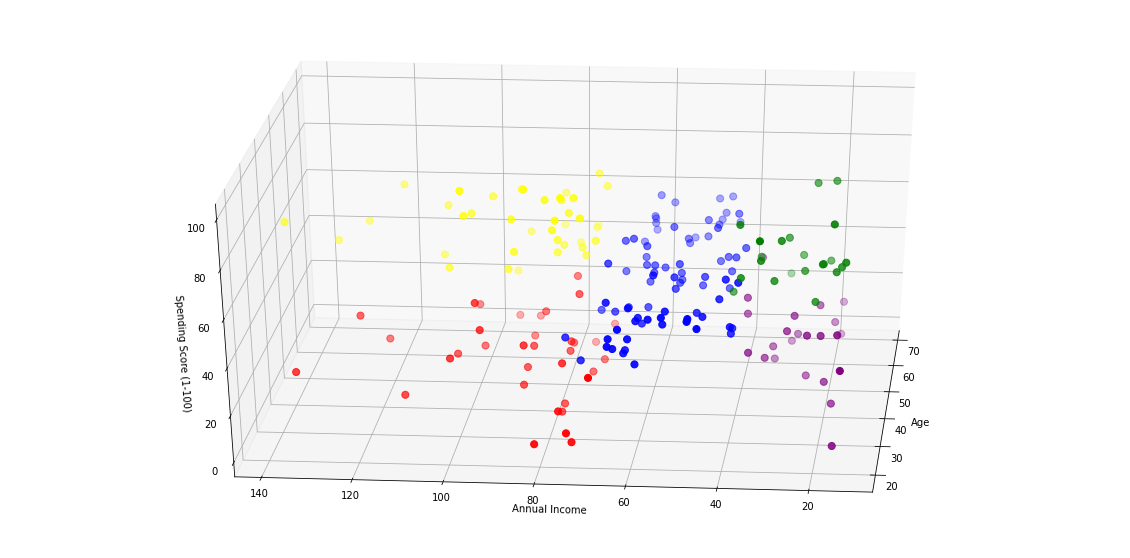

In [39]:
fig = plt.figure()
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=50)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=50)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=50)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='yellow', s=50)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=50)
ax.view_init(30, 185) #This is basically for elevation... Viewing the plot in proper angle
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score (1-100)')
plt.show()